In [35]:
import numpy as np
import pandas as pd
import random
from scipy.spatial import distance
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [48]:
def PCA(data_arr, n):
    """Takes in a non-standardized data array and performs PCA using SVD. Data should be in tidy format,
    with rows as observations and columns as variables"""
    num_rows = data_arr.shape[0]
    # Center the data
    centroid = np.mean(data_arr, axis=0)
    X_star = data_arr-centroid
    
    # Do SVD
    U, s, V_T = linalg.svd(X_star)
    eig_vectors = np.transpose(V_T)
    eig_vals = np.divide(s**2, num_rows-1)
    
    # Get the data projected into the number of PCA components specified
    PCA_data = np.matmul(X_star, eig_vectors[:,0:(n)])
    
    return PCA_data, eig_vectors, eig_vals, s, U, centroid

def plot_moriarty_PCA_data(PCA_data, cluster_labels):

    plt.figure(figsize=(15,15))
    
    clusters = np.unique(cluster_labels)
    
    if len(clusters) <= 16:
        colors = [ 'xkcd:red',    'xkcd:green',  'xkcd:magenta', 'xkcd:blue',
          'xkcd:purple', 'xkcd:orange', 'xkcd:cyan',    'xkcd:lime',
          'xkcd:pink',   'xkcd:yellow', 'xkcd:teal',    'xkcd:lavender',
          'xkcd:brown',  'xkcd:maroon', 'xkcd:olive',   'xkcd:navy' ]
        
    else:
        colors = cm.tab20(np.linspace(0, 1, len(clusters)))
    
    for cluster in clusters:
        plot_data_idx = (cluster_labels == cluster)
        plot_data = PCA_data[plot_data_idx,:]
        plt.scatter(plot_data[:,0], plot_data[:,1], marker='o', alpha=0.8, color=colors[cluster])
    
    plt.title("Biplot for first 2 PCs (normalized)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")

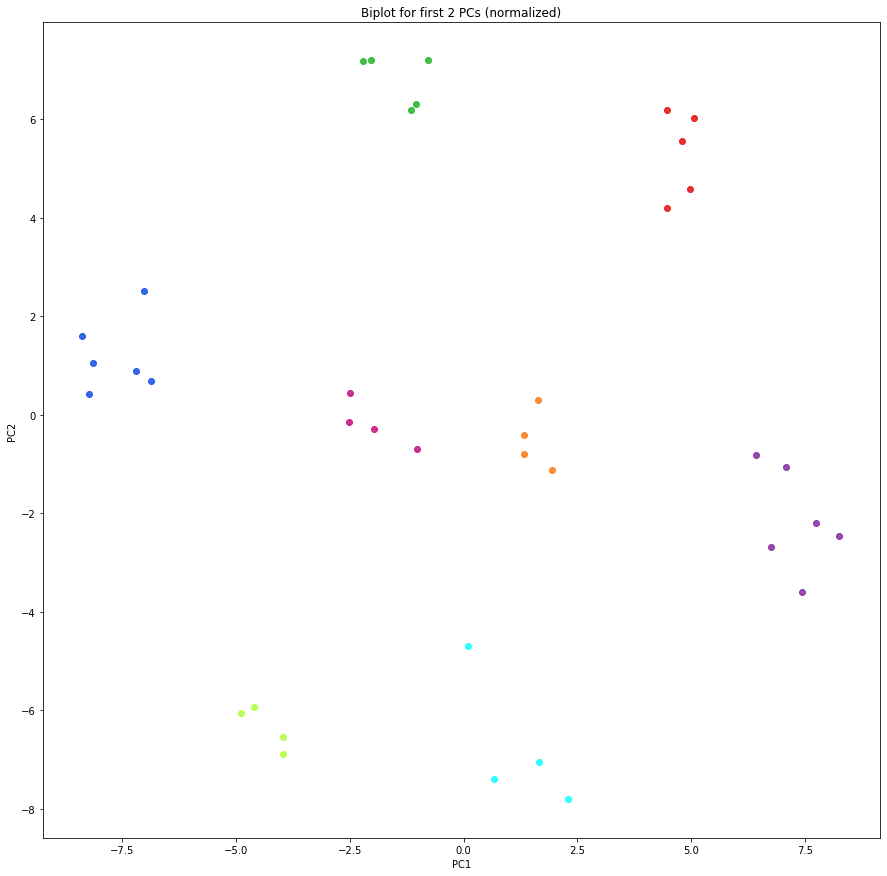

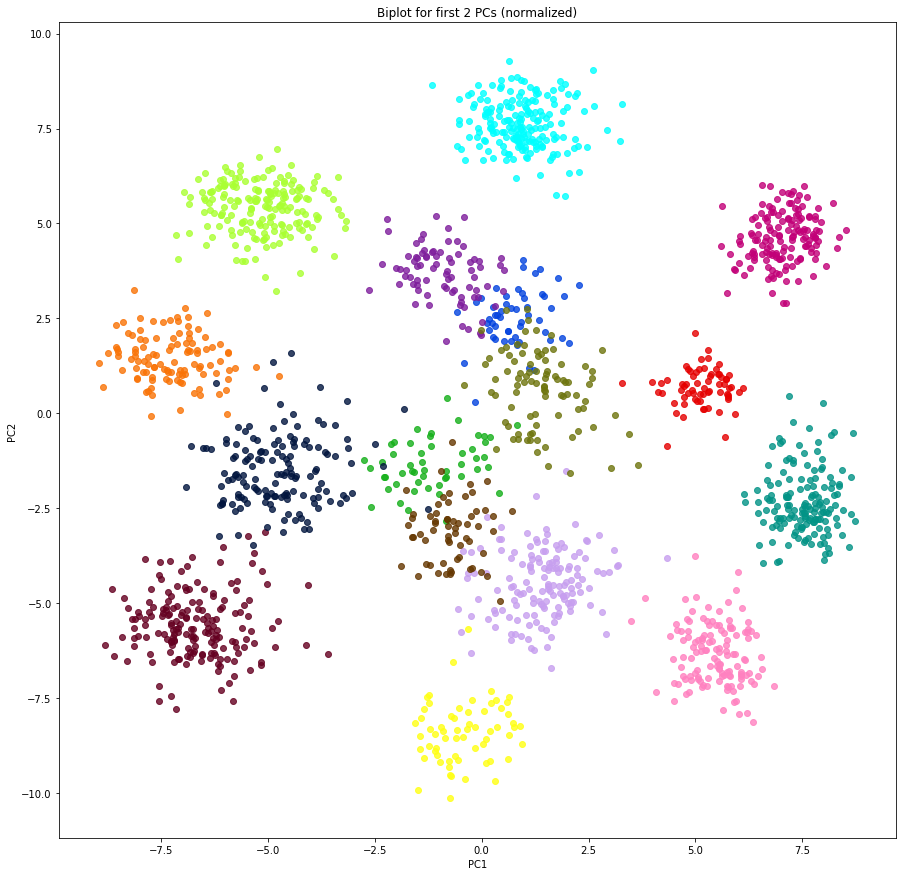

In [54]:
small_data = pd.read_csv("w11-data-small.tbl", header=0, delim_whitespace=True)
small_data_labels = small_data["type"].values
small_log_counts = np.log(small_data.drop("type", axis=1).values+1)

large_data = pd.read_csv("w11-data-large.tbl", header=0, delim_whitespace=True)
large_data_labels = large_data["type"].values
large_log_counts = np.log(large_data.drop("type", axis=1).values+1)

small_PCA_data = PCA(small_log_counts, 3)[0]
large_PCA_data = PCA(large_log_counts, 4)[0]

plot_moriarty_PCA_data(small_PCA_data, small_data_labels)
plot_moriarty_PCA_data(large_PCA_data, large_data_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])